## Import libraries

In [12]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm_notebook
import torch
from torch.utils.data import DataLoader
from module.model import GaussianCnnPredictor
from module.tools import get_bbx, denormalization, draw_bbx
import datasets.mvtec as mvtec

print(f'cuda is available: {torch.cuda.is_available()}')

cuda is available: True


## Parameter setting

In [2]:
class_name = 'leather'
data_path = '../datasets/mvtec_anomaly_detection'
save_path = '../mvtec_result'
arch = 'resnet18'

## DataLoader

In [3]:
train_dataset = mvtec.MVTecDataset(data_path, class_name=class_name, is_train=True)
train_dataloader = DataLoader(train_dataset, batch_size=32, pin_memory=True)
test_dataset = mvtec.MVTecDataset(data_path, class_name=class_name, is_train=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, pin_memory=True)

## Model

In [4]:
model = GaussianCnnPredictor(arch = arch)

## Train

In [5]:
model.fit(train_dataloader)

| feature extraction |:   0%|          | 0/8 [00:00<?, ?it/s]

fit start


| feature extraction |: 100%|██████████| 8/8 [00:14<00:00,  1.80s/it]
  4%|▍         | 133/3136 [00:00<00:02, 1297.04it/s]

<class 'torch.Tensor'>
got embedding


100%|██████████| 3136/3136 [00:02<00:00, 1325.12it/s]


## Predict

In [6]:
heatmaps = model.predict(test_dataloader)

| feature extraction |:   0%|          | 0/4 [00:00<?, ?it/s]

predict start


| feature extraction |: 100%|██████████| 4/4 [00:07<00:00,  1.85s/it]
  0%|          | 0/3136 [00:00<?, ?it/s]

<class 'torch.Tensor'>
got embedding


100%|██████████| 3136/3136 [01:25<00:00, 36.75it/s] 


## Show results

In [7]:
test_imgs = []
for (x, _) in tqdm_notebook(test_dataloader):
    test_imgs.extend(x.cpu().detach().numpy())

<ipython-input-7-8b04d2554f77>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for (x, _) in tqdm_notebook(test_dataloader):


  0%|          | 0/4 [00:00<?, ?it/s]

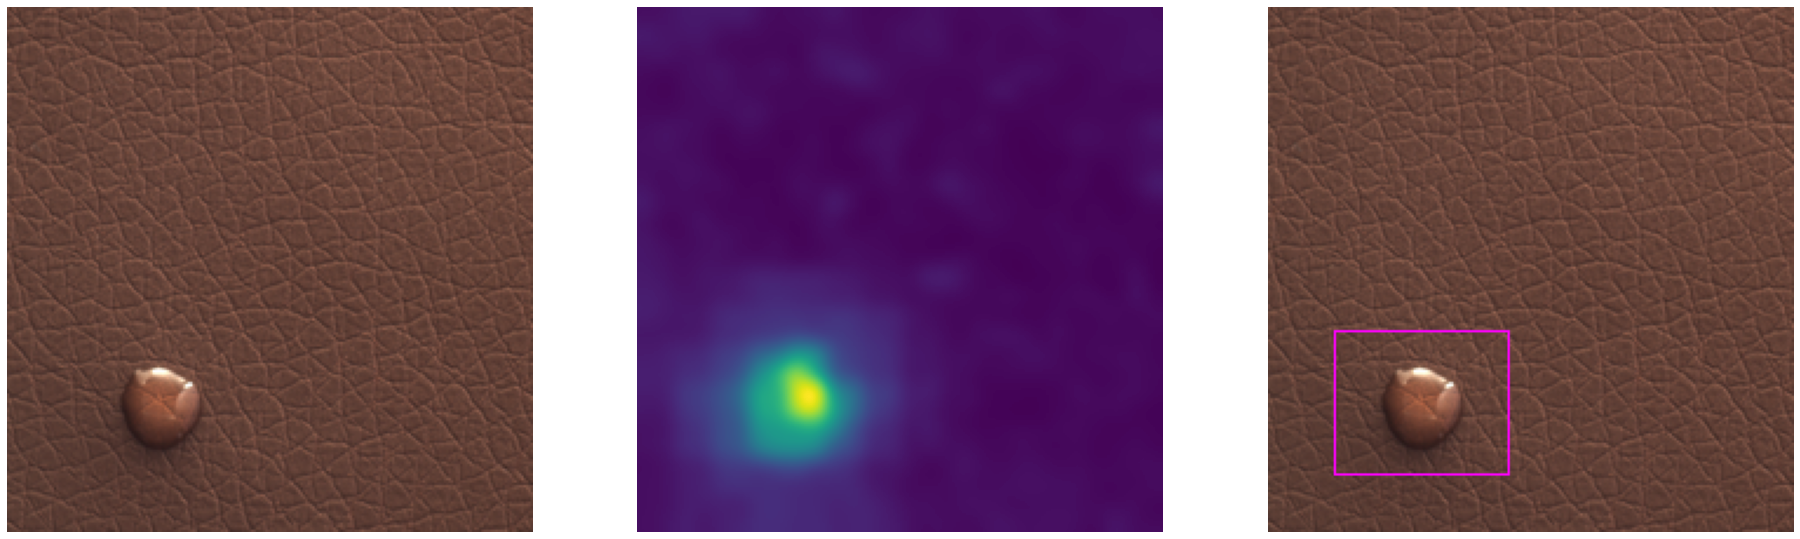

In [26]:
n = 60
img = test_imgs[n]
img = denormalization(img)
binary, bbxes, judge = get_bbx(heatmaps[n], threshold = 50, min_detected_area = 0)
c_img = draw_bbx(img, bbxes)
plt.figure(figsize=(32,12))

plt.subplot(1, 3, 1), plt.axis('off'), plt.imshow(img)
plt.subplot(1, 3, 2), plt.axis('off'), plt.imshow(heatmaps[n])
plt.subplot(1, 3, 3), plt.axis('off'), plt.imshow(c_img)
plt.show()